### Install library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load data yang digunakan

In [4]:
ds_test = pd.read_csv('application_test.csv')
ds_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [138]:
ds_train = pd.read_csv('application_train.csv')
ds_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Melihat apakah ada missing value pada data train

In [139]:
ds_train.isnull().values.any()

True

Ternyata terdapat missing value pada data train, lalu dilakukan pengecekan secara keseluruhan

In [140]:
ds_train.isna().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [141]:
count_nan_in_ds_train = ds_train.isnull().sum()
print (count_nan_in_ds_train)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


Text(0, 0.5, 'Amount')

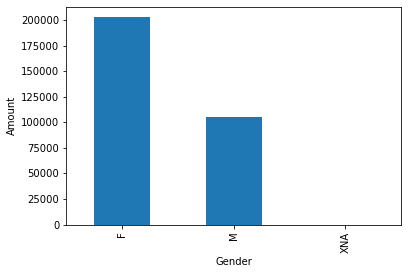

In [142]:
ds_train['CODE_GENDER'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')

In [143]:
gdr_count = ds_train['CODE_GENDER'].value_counts()
print(gdr_count)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Karena data XNA sangat sedikit sehingga dapat dilakukan penghapusan data atau mengedrop nilai tersebut

In [144]:
df_train = ds_train[ds_train['CODE_GENDER'] != 'XNA']

In [145]:
gdr_count_fix = df_train['CODE_GENDER'].value_counts()
print(gdr_count_fix)

F    202448
M    105059
Name: CODE_GENDER, dtype: int64


Text(0, 0.5, 'Amount')

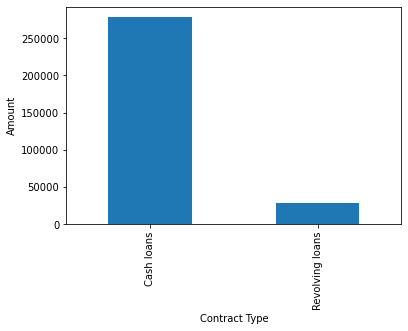

In [146]:
df_train['NAME_CONTRACT_TYPE'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

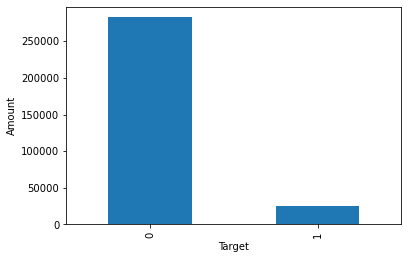

In [149]:
df_train['TARGET'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Amount')

In [147]:
ct_count_fix = df_train['NAME_CONTRACT_TYPE'].value_counts()
print(ct_count_fix)

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64


In [110]:
df = df_train.loc[:, 'SK_ID_CURR' : 'AMT_CREDIT']
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0
...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0


In [111]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04
25%,189146.500000,0.00000,0.000000,1.125000e+05,2.700000e+05
50%,278203.000000,0.00000,0.000000,1.471500e+05,5.135310e+05
75%,367143.500000,0.00000,1.000000,2.025000e+05,8.086500e+05
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06


In [112]:
df.isna().any()

SK_ID_CURR            False
TARGET                False
NAME_CONTRACT_TYPE    False
CODE_GENDER           False
FLAG_OWN_CAR          False
FLAG_OWN_REALTY       False
CNT_CHILDREN          False
AMT_INCOME_TOTAL      False
AMT_CREDIT            False
dtype: bool

In [113]:
df_na = df.isnull().sum()
print (df_na)

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
dtype: int64


In [114]:
df = df.drop('TARGET',axis=1)

In [115]:
df_na = df.isnull().sum()
print (df_na)

SK_ID_CURR            0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
dtype: int64


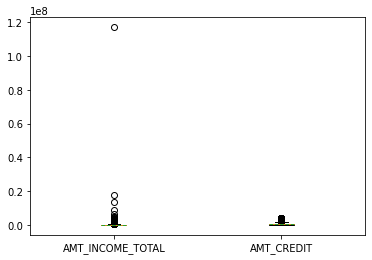

In [158]:
income = df['AMT_INCOME_TOTAL']
credit = df['AMT_CREDIT']
fig, ax = plt.subplots()
columns = [income, credit]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["AMT_INCOME_TOTAL", "AMT_CREDIT"])
plt.show()

In [159]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [160]:
upper, lower = outliers(df, "AMT_INCOME_TOTAL")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  337500.0
Lower Whisker:  -22500.0


In [161]:
upper, lower = outliers(df, "AMT_CREDIT")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  1616625.0
Lower Whisker:  -537975.0


In [162]:
df = df[(df['AMT_INCOME_TOTAL'] > lower) & (df['AMT_INCOME_TOTAL'] < upper)]

In [188]:
df = df[(df['AMT_CREDIT'] > lower) & (df['AMT_CREDIT'] < upper)]

In [189]:
#statistika data set train setelah dilakukan remove outliers
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
count,300889.000000,300889.000000,3.008890e+05,3.008890e+05
mean,278193.394584,0.416978,1.649794e+05,5.699122e+05
std,102798.605580,0.722244,8.950811e+04,3.526949e+05
min,100002.000000,0.000000,2.565000e+04,4.500000e+04
25%,189132.000000,0.000000,1.125000e+05,2.700000e+05
50%,278233.000000,0.000000,1.440000e+05,5.056425e+05
75%,367126.000000,1.000000,2.025000e+05,7.908300e+05
max,456255.000000,19.000000,1.575000e+06,1.616278e+06


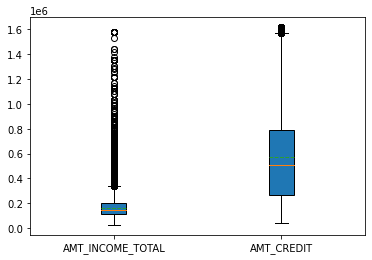

In [214]:
income = df['AMT_INCOME_TOTAL']
credit = df['AMT_CREDIT']
fig, ax = plt.subplots()
columns = [income, credit]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["AMT_INCOME_TOTAL", "AMT_CREDIT"])
plt.show()

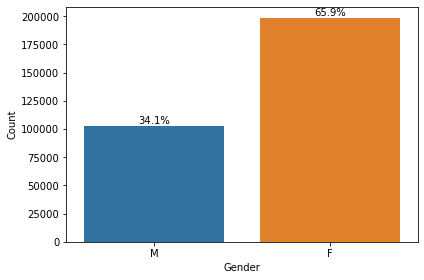

In [219]:
ax = sns.countplot(x='CODE_GENDER', data = df)
plt.xlabel('Gender')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

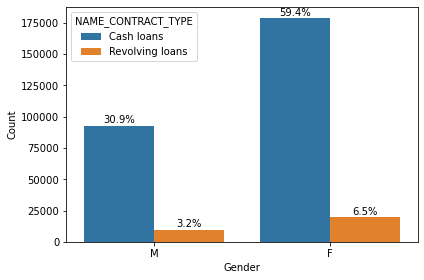

In [216]:
ax = sns.countplot(x='CODE_GENDER', hue = 'NAME_CONTRACT_TYPE', data = df)
plt.xlabel('Gender')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

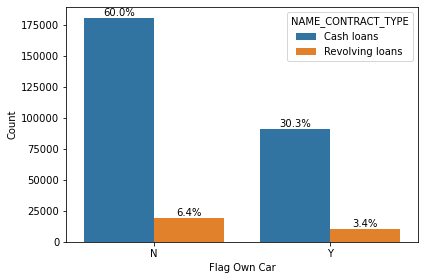

In [217]:
ax = sns.countplot(x='FLAG_OWN_CAR', hue = 'NAME_CONTRACT_TYPE', data = df)
plt.xlabel('Flag Own Car')
plt.ylabel('Count')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

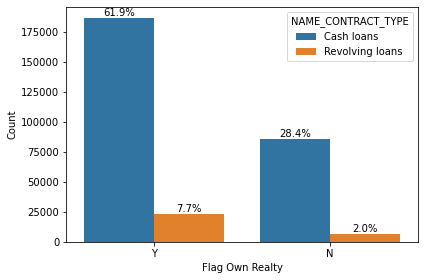

In [218]:
ax = sns.countplot(x='FLAG_OWN_REALTY', hue = 'NAME_CONTRACT_TYPE', data = df)
plt.xlabel('Flag Own Realty')
plt.ylabel('Count')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

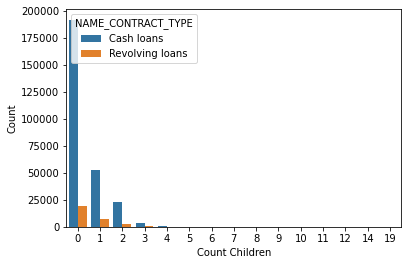

In [193]:
sns.countplot(x='CNT_CHILDREN', hue = 'NAME_CONTRACT_TYPE', data = df)
plt.xlabel('Count Children')
plt.ylabel('Count')

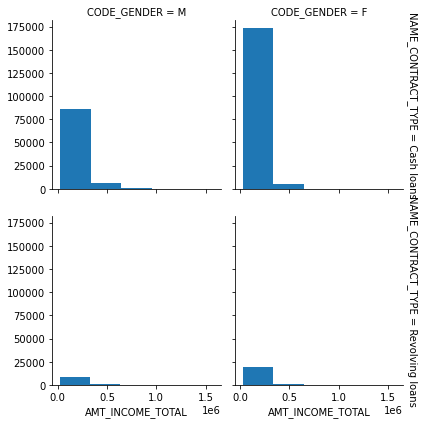

In [194]:
grid = sns.FacetGrid(df, col='CODE_GENDER', row='NAME_CONTRACT_TYPE',margin_titles=True)
grid.map(plt.hist, 'AMT_INCOME_TOTAL', bins=5)

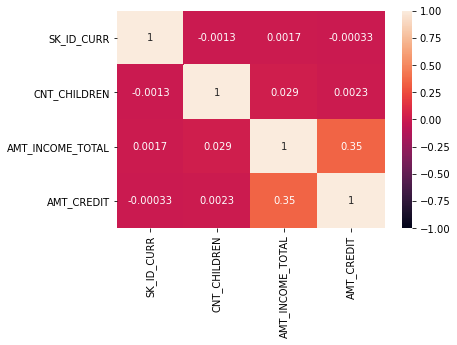

In [195]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

### Encoding ke data numerik

In [196]:
code_numeric = {'Cash loans':1,'Revolving loans':2,
                'M':1,'F':2,
                'Y':1,'N':2
}

## Model

In [197]:
df_train = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,100002,1,1,2,1,0,202500.0,406597.5
1,100003,1,2,2,2,0,270000.0,1293502.5
2,100004,2,1,1,1,0,67500.0,135000.0
3,100006,1,2,2,1,0,135000.0,312682.5
4,100007,1,1,2,1,0,121500.0,513000.0
...,...,...,...,...,...,...,...,...
307506,456251,1,1,2,2,0,157500.0,254700.0
307507,456252,1,2,2,1,0,72000.0,269550.0
307508,456253,1,2,2,1,0,153000.0,677664.0
307509,456254,1,2,2,1,0,171000.0,370107.0


In [198]:
y_train = df_train['NAME_CONTRACT_TYPE']
X_train = df_train.drop('NAME_CONTRACT_TYPE', axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

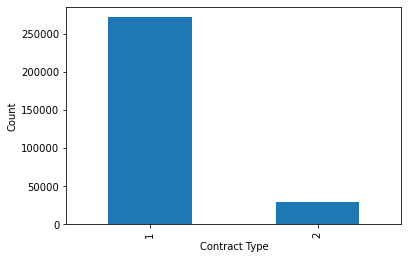

In [199]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

dari data di atas jumlah data tidak seimbang oleh karena itu dilakukan resample data

In [200]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)
X_train_1, y_train_1 = smote.fit_resample(X_train, y_train)

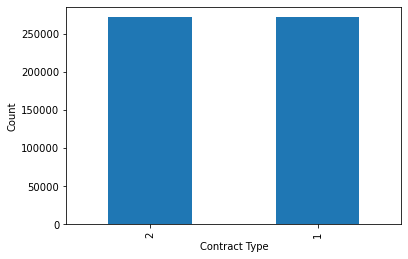

In [201]:
y_train_1.value_counts().plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

sekarang kedua data label sudah balance

In [202]:
df_test = ds_test.loc[:, 'SK_ID_CURR' : 'AMT_CREDIT']
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,100001,1,2,2,1,0,135000.0,568800.0
1,100005,1,1,2,1,0,99000.0,222768.0
2,100013,1,1,1,1,0,202500.0,663264.0
3,100028,1,2,2,1,2,315000.0,1575000.0
4,100038,1,1,1,2,1,180000.0,625500.0
...,...,...,...,...,...,...,...,...
48739,456221,1,2,2,1,0,121500.0,412560.0
48740,456222,1,2,2,2,2,157500.0,622413.0
48741,456223,1,2,1,1,1,202500.0,315000.0
48742,456224,1,1,2,2,0,225000.0,450000.0


In [203]:
y_test = df_test['NAME_CONTRACT_TYPE']
X_test = df_test.drop('NAME_CONTRACT_TYPE', axis = 1)

In [204]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SK_ID_CURR          48744 non-null  int64  
 1   NAME_CONTRACT_TYPE  48744 non-null  int64  
 2   CODE_GENDER         48744 non-null  int64  
 3   FLAG_OWN_CAR        48744 non-null  int64  
 4   FLAG_OWN_REALTY     48744 non-null  int64  
 5   CNT_CHILDREN        48744 non-null  int64  
 6   AMT_INCOME_TOTAL    48744 non-null  float64
 7   AMT_CREDIT          48744 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.0 MB


### Using Logistic Regression

In [205]:
model = LogisticRegression()
model.fit(X_train_1, y_train_1)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.6848361213110294

In [206]:
print(round(model.score(X_test, y_test) * 100, 2), '%')

52.46 %


In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))


              precision    recall  f1-score   support

           1       1.00      0.52      0.68     48305
           2       0.02      0.89      0.03       439

    accuracy                           0.52     48744
   macro avg       0.51      0.71      0.36     48744
weighted avg       0.99      0.52      0.68     48744



### Using Decision Tree

In [208]:
tree =  DecisionTreeClassifier()
tree.fit(X_train_1, y_train_1)
ypred_tree = tree.predict(X_test)
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.9515491921257967

In [209]:
print(round(tree.score(X_test, y_test) * 100, 2), '%')

90.82 %


In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred_tree))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95     48305
           2       0.07      0.69      0.12       439

    accuracy                           0.91     48744
   macro avg       0.53      0.80      0.54     48744
weighted avg       0.99      0.91      0.94     48744



### Using Random Forest Clssifier

In [211]:
forest = RandomForestClassifier()
forest.fit(X_train_1, y_train_1)
ypred_forest = forest.predict(X_test)
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.9582030200440647

In [212]:
print(round(forest.score(X_test, y_test) * 100, 2), '%')

92.02 %


In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_forest))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96     48305
           2       0.07      0.63      0.12       439

    accuracy                           0.92     48744
   macro avg       0.53      0.78      0.54     48744
weighted avg       0.99      0.92      0.95     48744

